# 1 Exploratory Data Analysis

# 2 데이터셋 출처
- Pima Indians Diabetes Databasa | Kaggle

## 2.1 데이터 구성
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 3 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 4 데이터 로드

In [2]:
df = pd.read_csv('file-path/data/diabetes.csv')
df.shape

(768, 9)

In [3]:
# 위에서  5개만 미리보기 합니다.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# info로 데이터타입,결측치,메모리 사용량 등의 정보를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 결측치를 봅니다.
df_null = df.isnull()
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# 수치데이터에 대한 요약을 봅니다.
# 0인 값들은 결측치일 확률이 높아보인다.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# 가장 마지막에 있는 Outcome 은 label 값이기 때문에 제외하고
# 학습과 예측에 사용할 컬럼을 만들어 줍니다.
# feature_columns 라는 변수에 담아줍니다.
feature_columns = df.columns[:-1].tolist()

# 5 결측치 시각화
- 값을 요약해 보면 최솟값이 0으로 나오는 값들이 있습니다. 0이 나올 수 있는 값도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있을 것 입니다. 따라서 0인 값을 결측치로 처리하고 시각화 해봅니다.

In [8]:
cols = feature_columns[1:]

In [9]:
# 결측치 여부를 나타내는 데이터프레임을 만듭니다.
# 0값을 결측치라 가정하고 정답(label, targer)값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null 이라는 데이터프레임에 담습니다.
# 인슐린의 결측치가 많은 것을 볼 수 있다.
df_null = df[cols].replace(0,np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

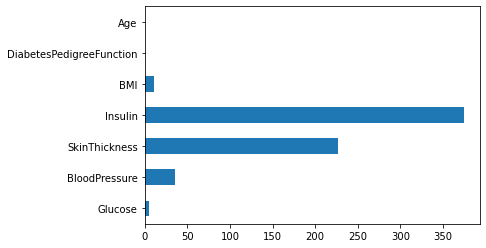

In [10]:
# 결측치 갯수를 구해 막대 그래프로 시각화 합니다.
df_null.sum().plot.barh()

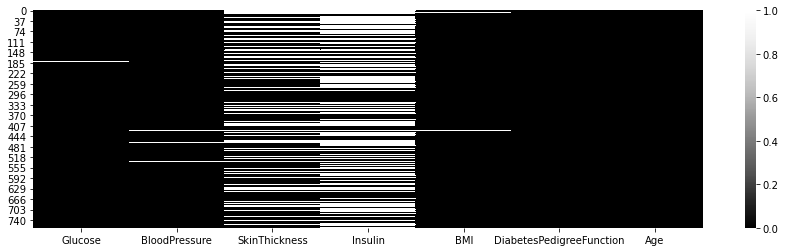

In [11]:
# 결측치를 heatmap으로 시각화 합니다.
plt.figure(figsize=(15,4))
sns.heatmap(df_null,cmap='Greys_r')

# 6 정답값
- targer, label 이라고 부르기도 합니다.

In [12]:
#  정답값인 Outcome 의 개수를 봅니다.
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
# 정답값인 Outcome의 비율을 봅니다.
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [14]:
# 다른 변수와 함께 봅니다.
# 임신횟수와 정답값을 비교해 봅니다.
#  'Pregnancies'를 groupby로 그룹화해서 Outcome 에 대한 비율을 구합니다.
# 결과를 df_po라는 변수에 저장합니다.

# 임신횟수가 늘수록 당뇨병 발병 확률이 올라가는 것을 볼 수 있다.

df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


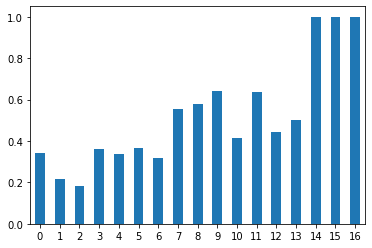

In [15]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po['mean'].plot.bar(rot=0)

# 7 countplot

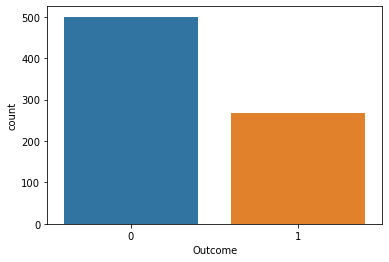

In [16]:
# 위에서 구했던 당뇨병 발병 비율을 구해봅니다.
# 당뇨병 발병 빈도수를 비교합니다.

sns.countplot(data=df, x='Outcome')

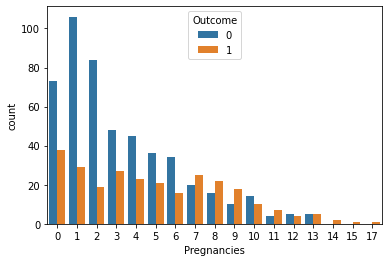

In [17]:
# 임신횟수에 따른 당뇨병 발병 빈도수를 비교합니다.
sns.countplot(data=df, x='Pregnancies',hue='Outcome')

In [18]:
# 임신 횟수의 많고 적음에 따라 Pregnancies_high 변수를 만듭니다.

df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [19]:
# Pregnancies_high 변수의 빈도수를 countplot 으로 그리고 
# Outcome 값에 따라 다른 색상으로 표현합니다.

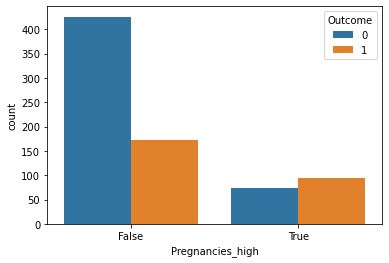

In [20]:
sns.countplot(data=df,x='Pregnancies_high',hue='Outcome')

# 8 barplot
- 기본 설정으로 시각화 하면 y축에는 평균을 추정해서 그리게 됩니다.

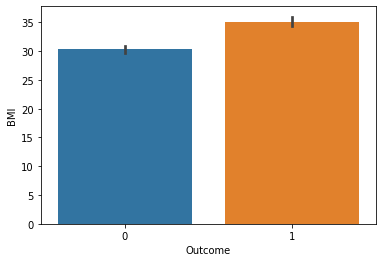

In [28]:
# 당뇨병 발병에 따른 Bmi 수치를 비교합니다.
df.pivot_table(index='Outcome',values='BMI')
sns.barplot(data=df,x='Outcome',y='BMI')

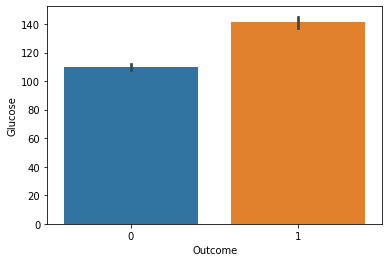

In [29]:
# 당뇨병 발병에 따른 포도당(glucose) 수치를 비교합니다.
sns.barplot(data=df,x='Outcome',y='Glucose')

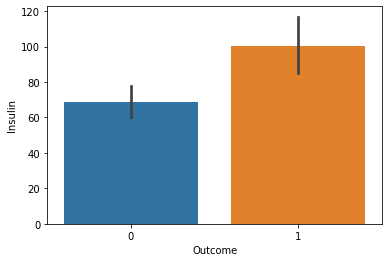

In [30]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병을 비교합니다.
sns.barplot(data=df,x='Outcome',y='Insulin')

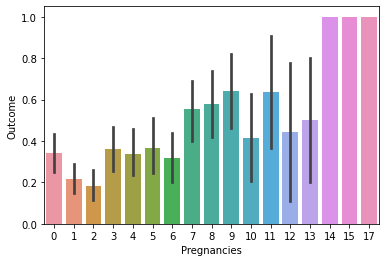

In [31]:
# 임신횟수에 대해서 당뇨병 발병 비율을 비교합니다.
sns.barplot(data=df,x='Pregnancies',y='Outcome')

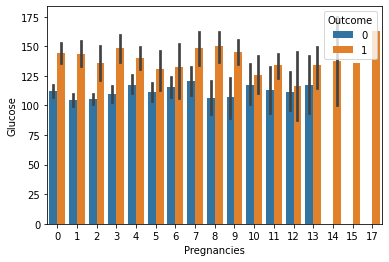

In [32]:
# 임신횟수에 따른 포도당 수치를 당뇨병 발병여부에 따라 시각화 합니다.

sns.barplot(data=df,x='Pregnancies',y='Glucose',hue='Outcome')

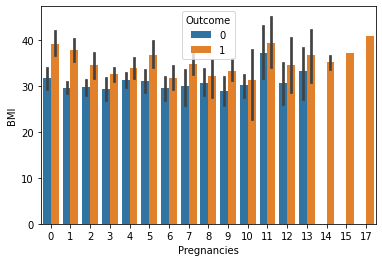

In [34]:
# 임신횟수에 따른 체질량지수를 당뇨병 발병여부에 따라 시각화 합니다.
# bmi 지수는 임신횟수와는 별 관계가 없어보이지만 당뇨병환자들이 bmi 수치가 더 높은것은 볼 수 있다.
sns.barplot(data=df,x='Pregnancies',y='BMI',hue='Outcome')

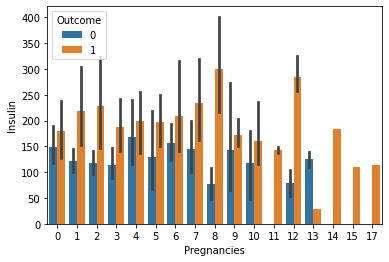

In [41]:
# 임신 횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰값에 대해서만 그립니다.

sns.barplot(data=df[df['Insulin']>0],x='Pregnancies',y='Insulin',hue='Outcome')

# 9 boxplot

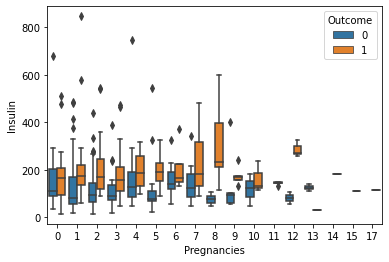

In [40]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다. 

sns.boxplot(data=df[df['Insulin']>0],x='Pregnancies' , y='Insulin',hue='Outcome')

# 10 violinplot

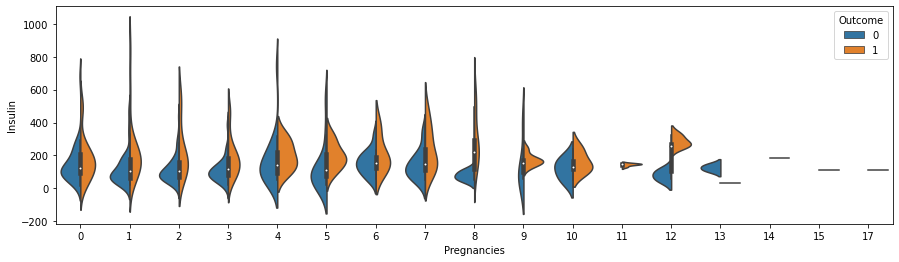

In [44]:
# 위의 그래프를 violinplot으로 시각화합니다.
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin']>0],x='Pregnancies' , y='Insulin',hue='Outcome',split=True)

# 11 swarmplot

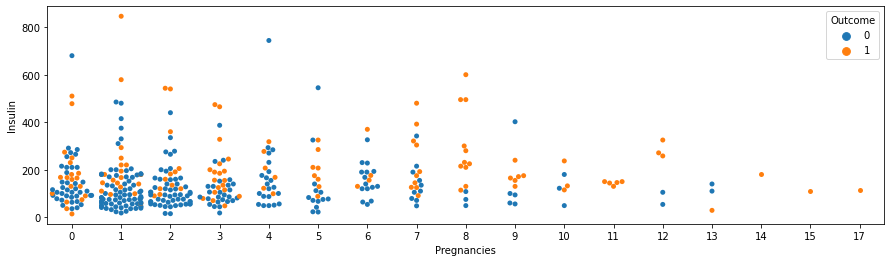

In [45]:
# 위의 그래프를 swarmplot 으로 시각화합니다.
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin']>0],x='Pregnancies' , y='Insulin',hue='Outcome')

# 12 distplot

In [53]:
df_0 = df[df['Outcome']  == 0]
df_1 = df[df['Outcome']  == 1]

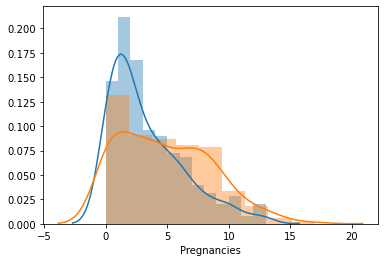

In [54]:
# 임신횟수에 따른 당뇨병 발병 여부를 시각화 합니다.
# a는 판다스의 시리즈 개념을 뜻함
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

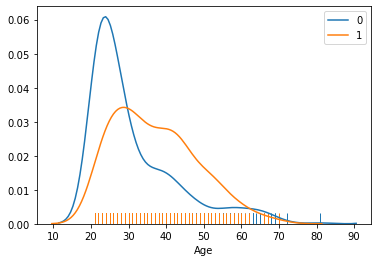

In [59]:
# 나이에 따른 당뇨병 발병 여부를 시각화합니다.
sns.distplot(df_0['Age'], hist=False, rug=True, label=0)
sns.distplot(df_1['Age'], hist=False, rug=True, label=1)

# 13 Subplots

## 13.1 Pandas를 통한 histplot 그리기
- pandas를 사용함녀 모든 변수에 대한 서브플롯을 한 번에 그려줍니다.


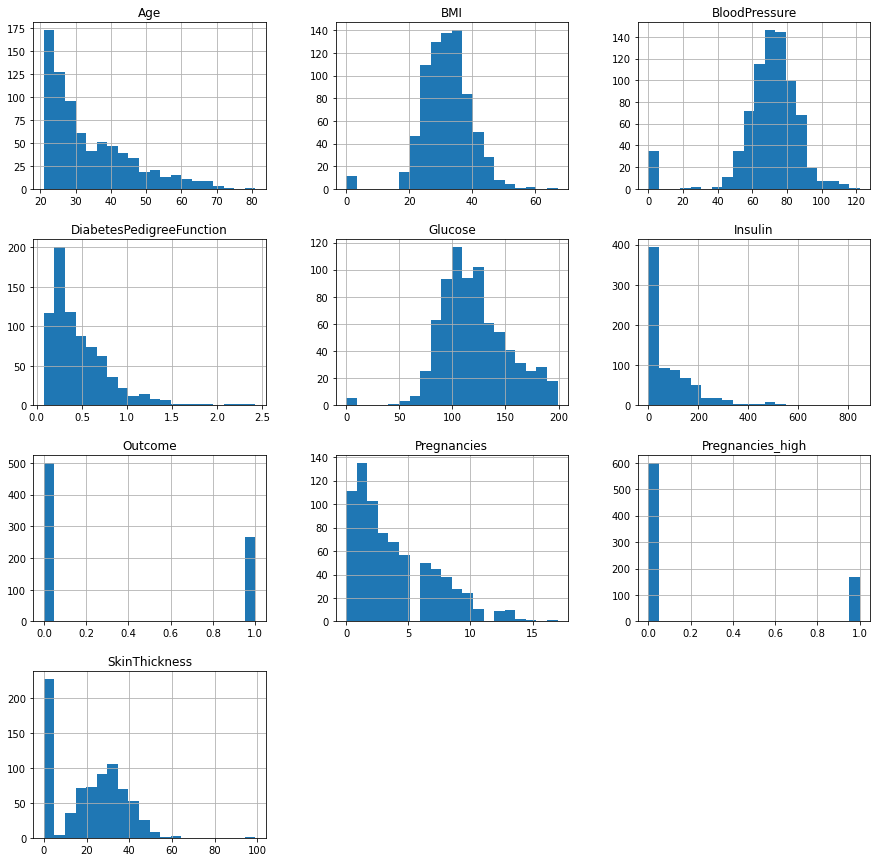

In [72]:
df['Pregnancies_high']=df['Pregnancies_high'].astype(int)
h = df.hist(figsize=(15,15),bins=20)

## 13.2 반복문을 통한 서브플롯 그리기

### 13.2.1 distplot

In [84]:
# 컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화를 합니다.

cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 0 2
3 SkinThickness 1 0
4 Insulin 1 1
5 BMI 1 2
6 DiabetesPedigreeFunction 2 0
7 Age 2 1
8 Outcome 2 2


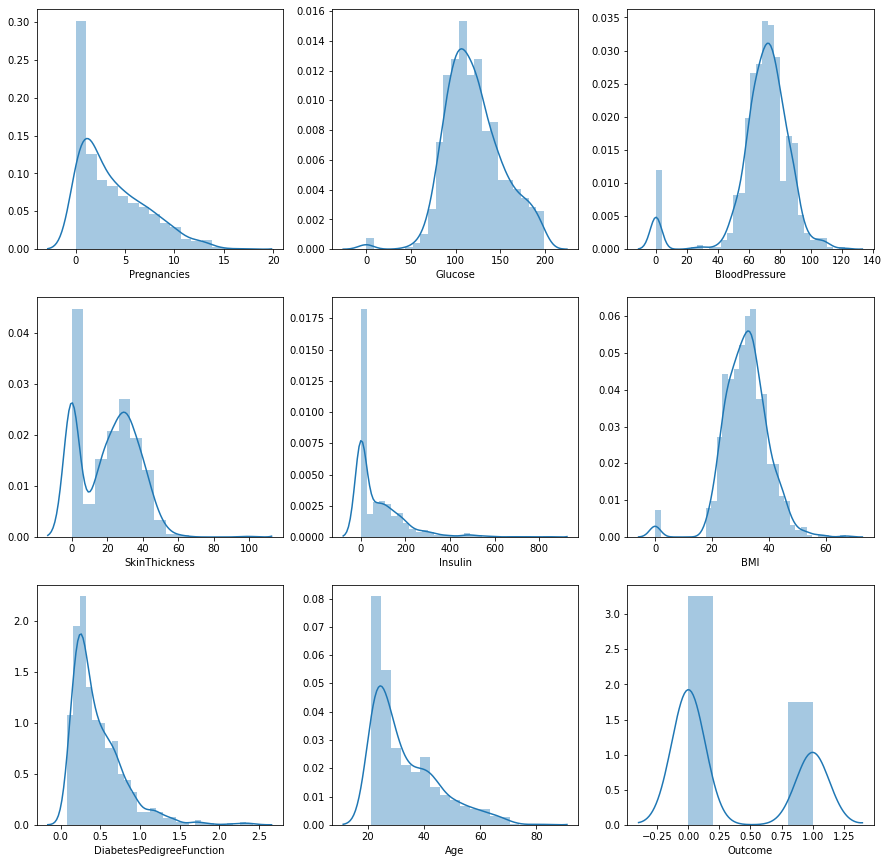

In [87]:
# distplot으로 서브플롯을 그립니다.

fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(15,15))

for i,col_name in enumerate(cols):
    row = i//3
    col = i%3
    print(i,col_name,row,col)
    sns.distplot(df[col_name], ax=axes[row][col])

In [90]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 1 0
3 SkinThickness 1 1
4 Insulin 2 0
5 BMI 2 1
6 DiabetesPedigreeFunction 3 0
7 Age 3 1


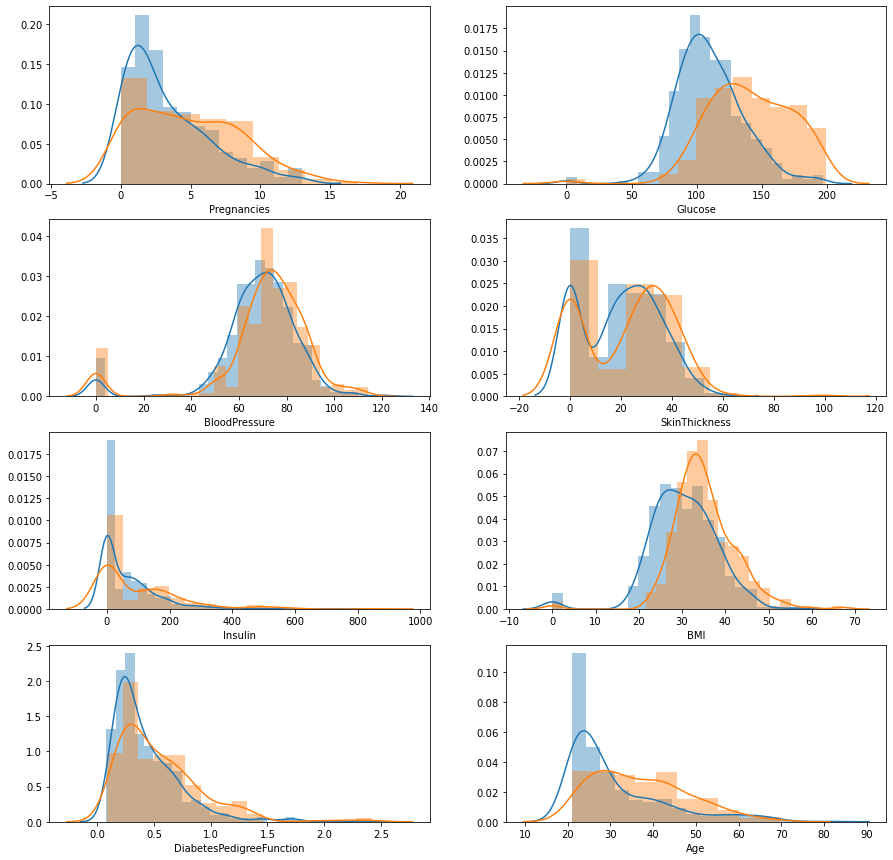

In [91]:
# 모든 변수에 대한 distplot을 그려봅니다.

fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(15,15))

for i,col_name in enumerate(cols[:-1]):
    row = i//2
    col = i%2
    print(i,col_name,row,col)
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

### 13.2.2 violinplot

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 1 0
3 SkinThickness 1 1
4 Insulin 2 0
5 BMI 2 1
6 DiabetesPedigreeFunction 3 0
7 Age 3 1


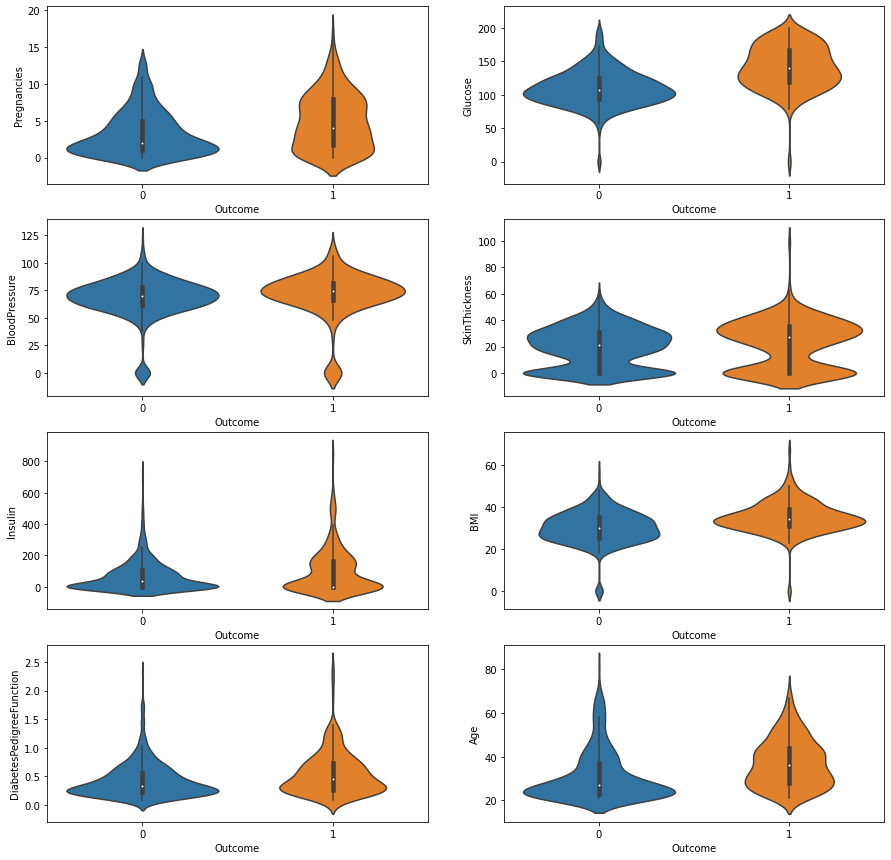

In [93]:
# violinplot 으로 서브플롯을 그려봅니다.

fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(15,15))

for i,col_name in enumerate(cols[:-1]):
    row = i//2
    col = i%2
    print(i,col_name,row,col)
    sns.violinplot(data = df,x='Outcome',y=col_name, ax=axes[row][col])


### 13.2.3 lmplot
- 상관계수가 높은 두 변수에 대해 시각화 합니다.

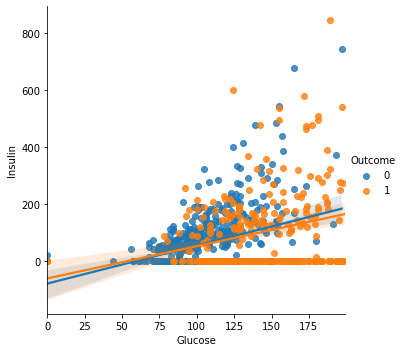

In [96]:
# Glucose 와 Insulin 을 Outcome 으로 구분해 봅니다.

sns.lmplot(data=df,x='Glucose',y='Insulin',hue='Outcome')

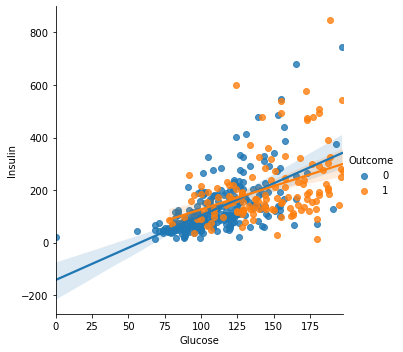

In [97]:
# Insulin 수치가 0 이상인 데이터로만 그려봅니다.

sns.lmplot(data=df[df['Insulin']>0],x='Glucose',y='Insulin',hue='Outcome')

### 13.2.4 pairplot

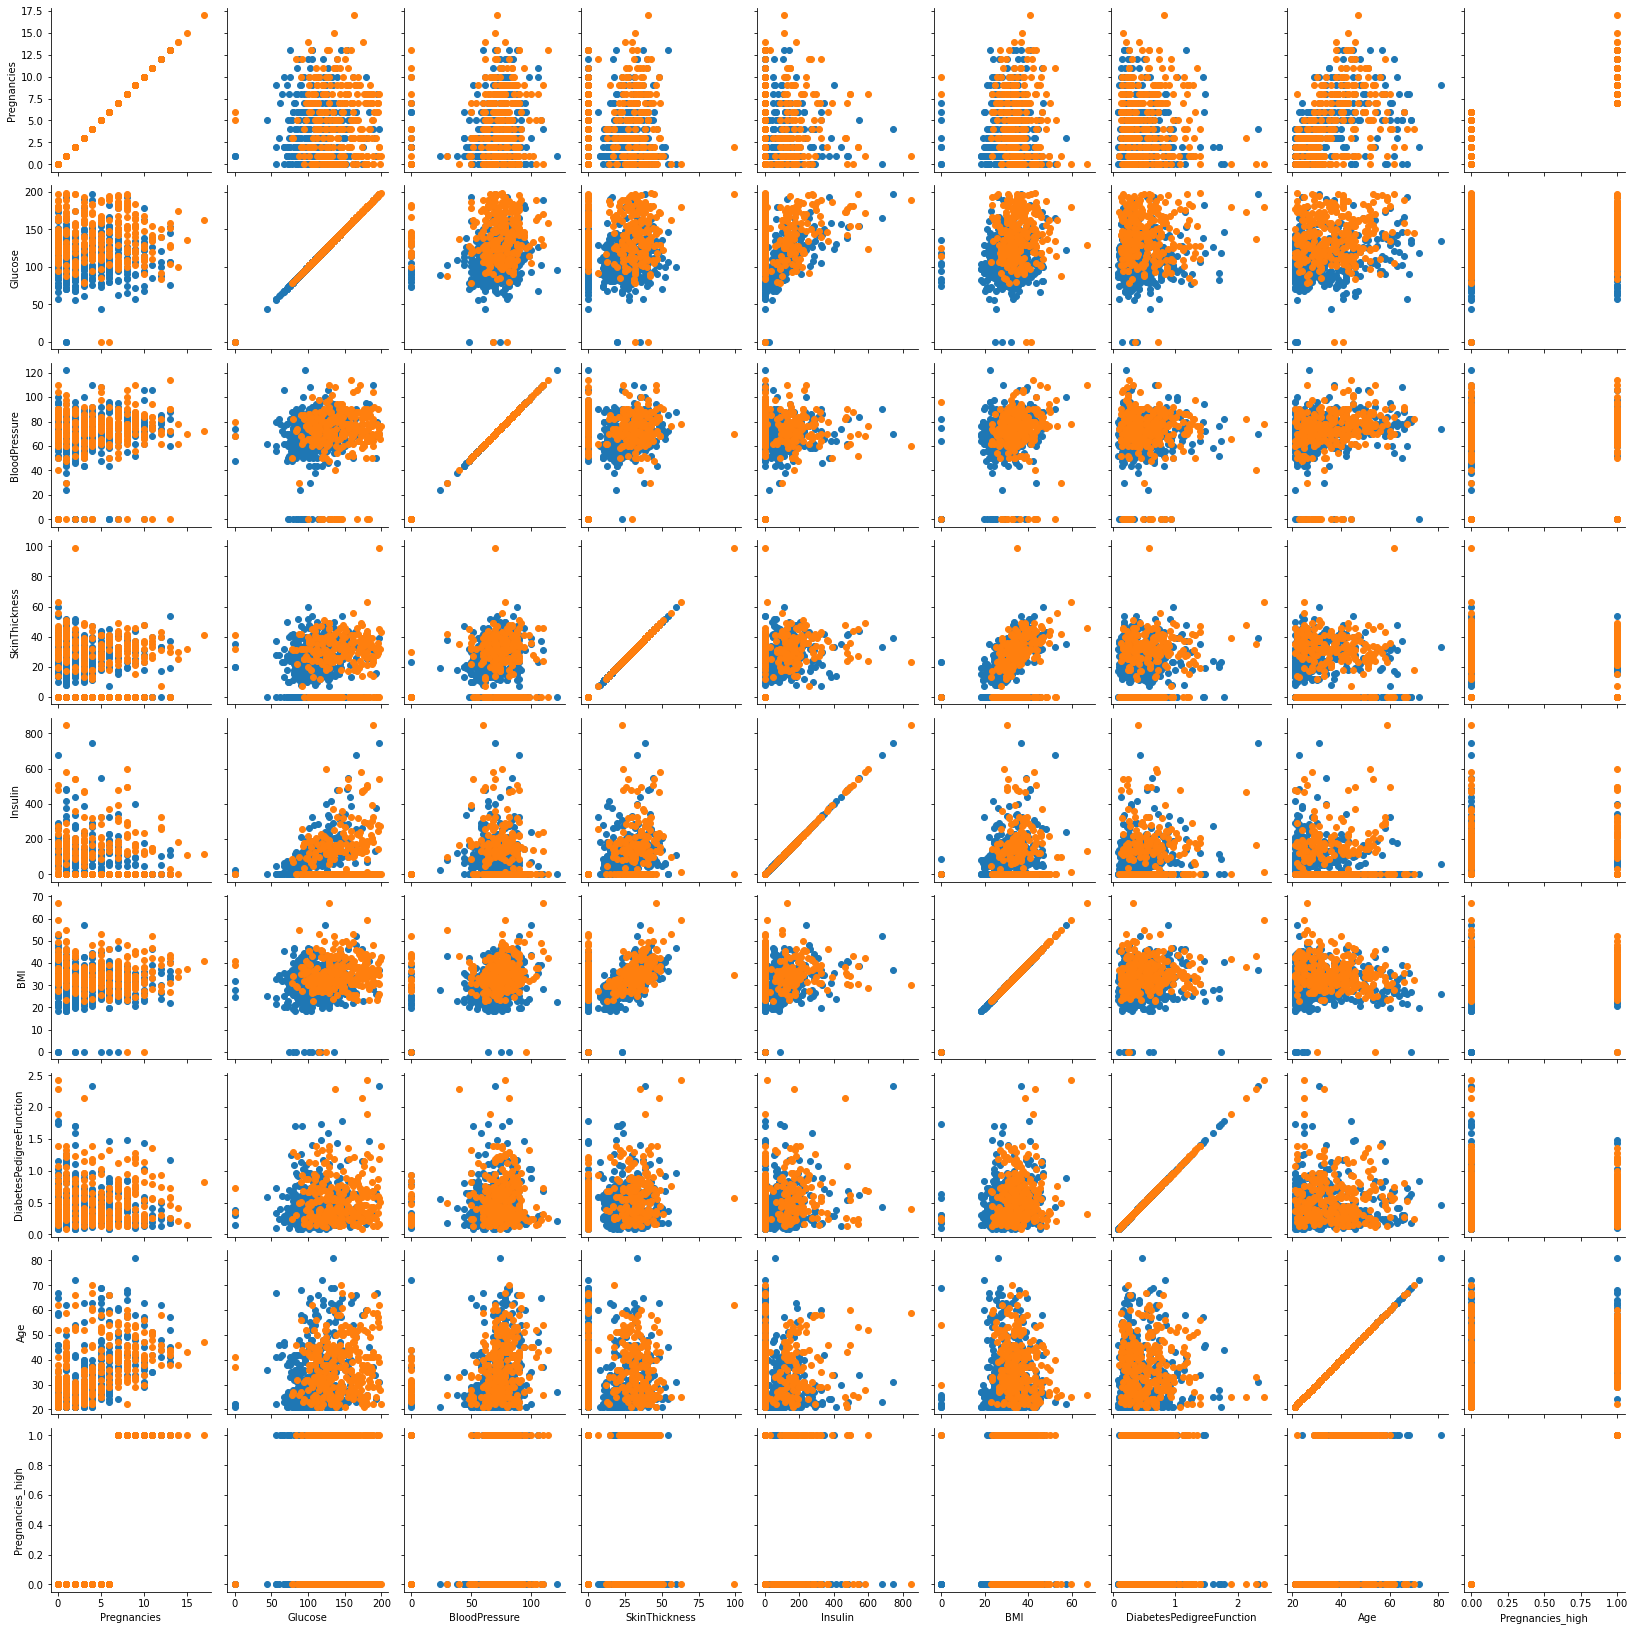

In [100]:
# PairGrid를 통해 모든 변수에 대해 Outcome 에 따른 scatterplot을 그려봅니다.

g = sns.PairGrid(df, hue='Outcome')
g.map(plt.scatter)

# 14 상관분석

In [112]:
df.iloc[:,:-2]
df_matrix = df.iloc[:,:-2].replace(0,np.nan)
df_matrix["Outcome"]=df['Outcome']
df_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [113]:
# 정답 값인 Outcome을 제외 하고 feature 로 사용할 컬럼들에 대해 0을 결측치로 만들어 줍니다.
# 상관계수를 구합니다.

df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


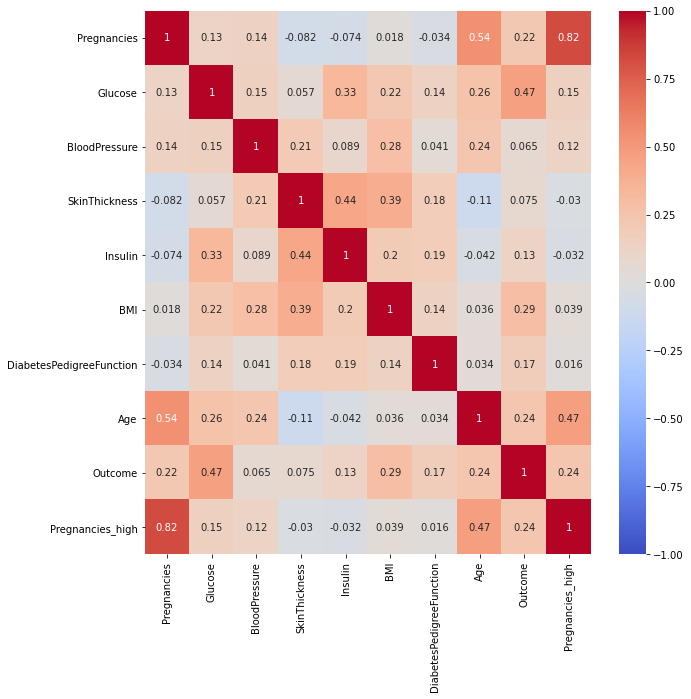

In [109]:
# 위에서 구한 상관계수를 heatmap으로 시각화 합니다.
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap='coolwarm',annot=True)

In [116]:
# Outcome 수치에 대한 상관계수만 모아서 봅니다.

df_corr['Outcome'].sort_values()

BloodPressure               0.170589
DiabetesPedigreeFunction    0.173844
Age                         0.238356
SkinThickness               0.259491
Pregnancies                 0.268218
Insulin                     0.303454
BMI                         0.313680
Glucose                     0.494650
Outcome                     1.000000
Name: Outcome, dtype: float64

## 14.1 상관계수가 높은 변수끼리 보기

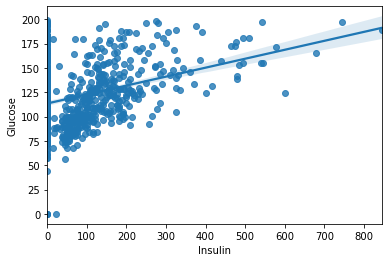

In [118]:
# insulin 과 glucose 로 regplot 그리기

sns.regplot(data=df, x='Insulin', y='Glucose')

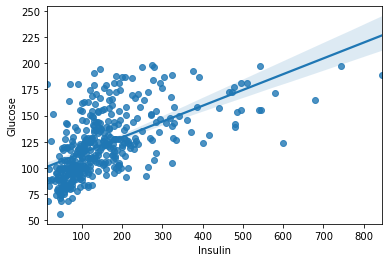

In [119]:
# df_0 으로 결측치 처리한 데이터 프레임으로 insulin 과 glucose 로 regplot 그리기

sns.regplot(data=df_matrix, x='Insulin', y='Glucose')

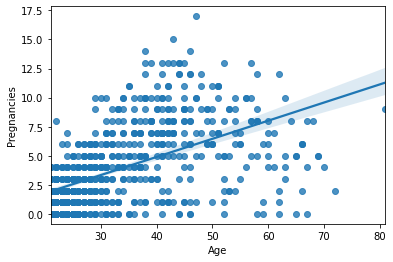

In [120]:
# Age와 Pregnancies 로 regplot 그리기

sns.regplot(data=df ,x='Age', y='Pregnancies')

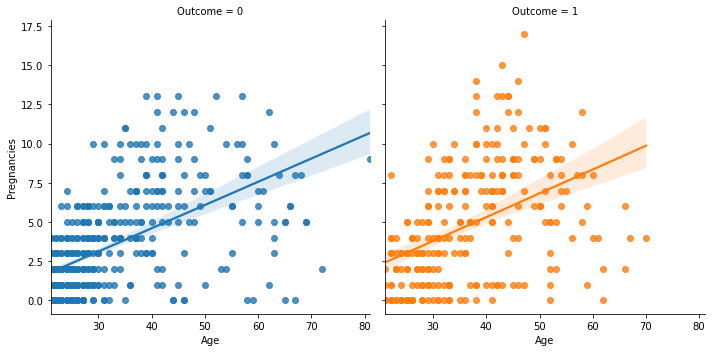

In [122]:
# Age와 Pregnancies 로 lmplot을 그리고 outcome에 따라 다른 색상을 표현하기

sns.lmplot(data=df,x='Age',y='Pregnancies',hue='Outcome',col='Outcome')